In [1]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/content/train.csv')

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
data.shape

(550068, 12)

In [7]:
missingfloat64 = data[data.dtypes[data.dtypes=='float64'].index].isna().sum()[(data.isna().sum()>0)].index
missingfloat64

Index(['Product_Category_2', 'Product_Category_3'], dtype='object')

In [8]:
for x in missingfloat64:
    data[x][data[x].isna()] = data[x].mean()

In [9]:
data.drop(['User_ID','Product_ID'], axis=1, inplace=True)
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [10]:
numcols=data.dtypes[(data.dtypes=='int64')|(data.dtypes=='float64')].index

In [11]:
import seaborn as sns

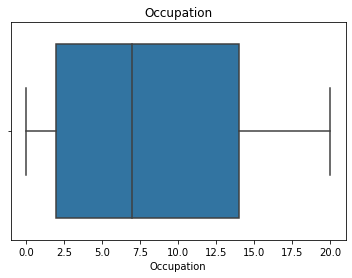

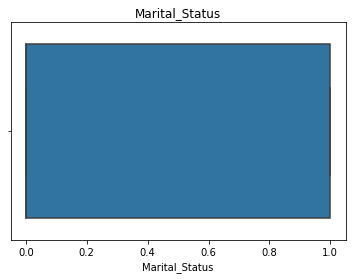

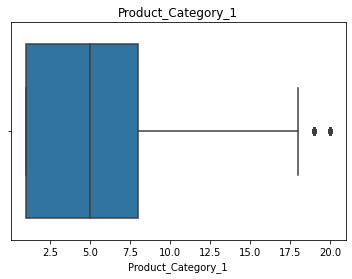

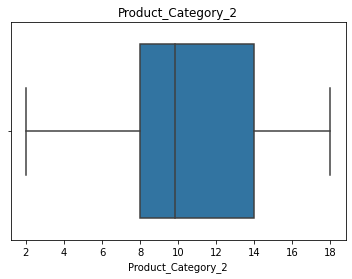

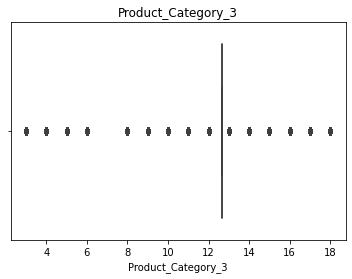

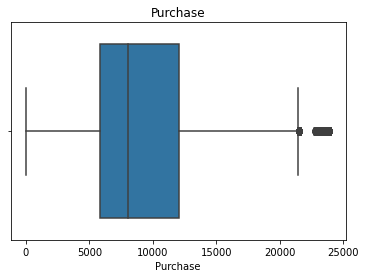

In [12]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [13]:
descp1 = data["Product_Category_1"].describe()
IQR = descp1['75%'] - descp1['25%']
upper_limitp1 =  descp1['75%'] + 1.5 * IQR
lower_limitp1 =  descp1['25%'] - 1.5 * IQR  
#outlier replacement
data["Product_Category_1"][data["Product_Category_1"]>upper_limitp1] = upper_limitp1
data["Product_Category_1"][data["Product_Category_1"]<lower_limitp1] = lower_limitp1

In [14]:
descp3 = data["Product_Category_3"].describe()
IQR = descp3['75%'] - descp3['25%']
upper_limitp3 =  descp3['75%'] + 1.5 * IQR
lower_limitp3 =  descp3['25%'] - 1.5 * IQR  
#outlier replacement
data["Product_Category_3"][data["Product_Category_3"]>upper_limitp3] = upper_limitp3
data["Product_Category_3"][data["Product_Category_3"]<lower_limitp3] = lower_limitp3

In [15]:
descp = data["Purchase"].describe()
IQR = descp['75%'] - descp['25%']
upper_limitp =  descp['75%'] + 1.5 * IQR
lower_limitp =  descp['25%'] - 1.5 * IQR  
#outlier replacement
data["Purchase"][data["Purchase"]>upper_limitp] = upper_limitp
data["Purchase"][data["Purchase"]<lower_limitp] = lower_limitp

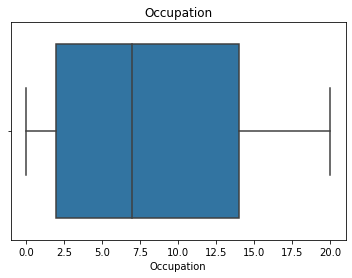

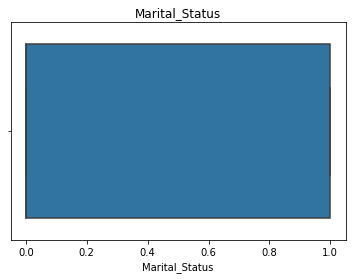

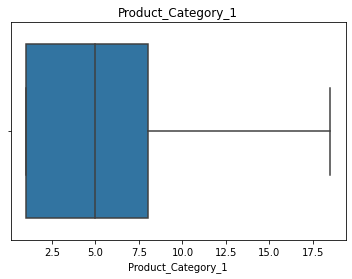

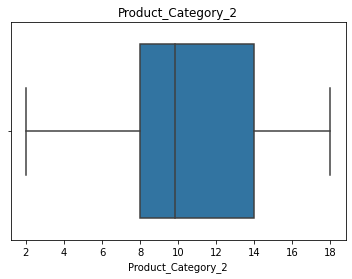

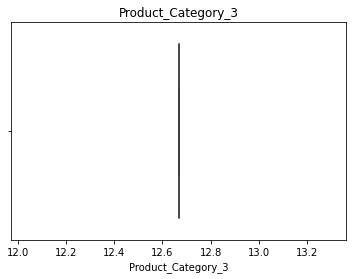

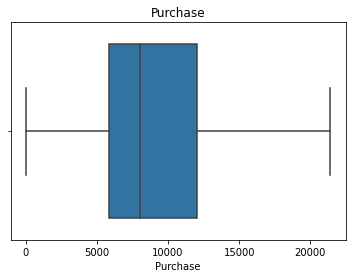

In [16]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [17]:
data['Age']=(data['Age'].str.strip('+'))

In [18]:
data['Stay_In_Current_City_Years']=(data['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [19]:
data.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years    float64
Marital_Status                  int64
Product_Category_1            float64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

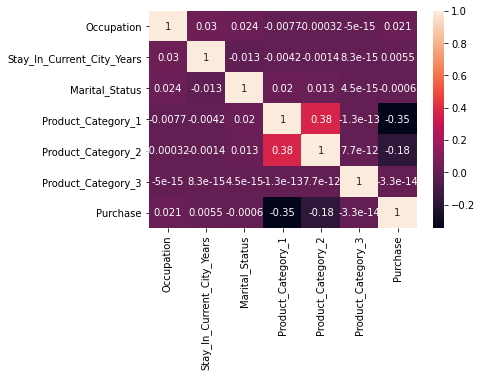

In [20]:
sns.heatmap(
    data.corr(),
    annot=True
)

In [21]:
Purchase_corr = data.corr()['Purchase']

In [22]:
Purchase_corr

Occupation                    2.085326e-02
Stay_In_Current_City_Years    5.470767e-03
Marital_Status               -5.987642e-04
Product_Category_1           -3.461875e-01
Product_Category_2           -1.818723e-01
Product_Category_3           -3.286765e-14
Purchase                      1.000000e+00
Name: Purchase, dtype: float64

In [23]:
abs(Purchase_corr)>0.1

Occupation                    False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1             True
Product_Category_2             True
Product_Category_3            False
Purchase                       True
Name: Purchase, dtype: bool

Occupation

Stay_In_Current_City_Years

Marital Status

Increase in any of the values for the above three features is likey to result in a higher purchase from the customer.


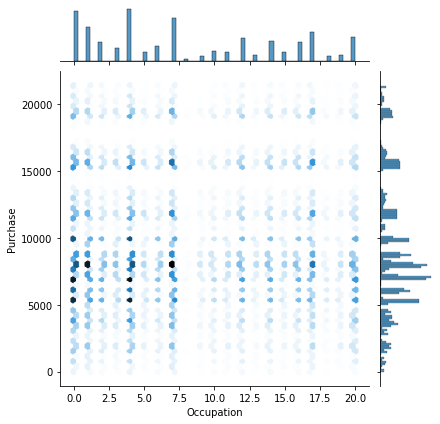

In [24]:
sns.jointplot(x='Occupation',y='Purchase',
              data=data, kind='hex'
             )

In [25]:
data['Gender']=data['Gender'].map({'M':1,'F':0})
data['Age']=pd.get_dummies(data['Age'])
data['City_Category'] = pd.get_dummies(data['City_Category'])

In [26]:
X = data.drop('Purchase',axis = 1)
y = data['Purchase']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 50)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lin_reg = LinearRegression()

In [29]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
m  = lin_reg.coef_
print(m)

[ 488.86394887 -474.48186443   10.09332382 -418.95429454   10.64471857
   23.82279069 -414.58391605  -71.04727828 -148.99761409]


In [31]:
c = lin_reg.intercept_
c

13725.749089756144

In [32]:
ypred=lin_reg.predict(X_test)  #ypred consist of the predicted salary corresponding to X_test

In [33]:
ypred_train = lin_reg.predict(X_train)

In [34]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE for Testing:",MSE)

MSE for Testing: 21928940.865160882


In [36]:
import numpy as np

In [37]:
RMSE =np.sqrt(MSE)
print("Root Mean Squared Error of Linear Regression:",RMSE)

Root Mean Squared Error of Linear Regression: 4682.834704018591


In [38]:
#Training Error
y_pred_training = lin_reg.predict(X_train)
MSE_training=mean_squared_error(y_pred_training,y_train)
print("MSE for Training:",MSE_training)

MSE for Training: 21775786.974791206


In [39]:
RMSE_training = np.sqrt(MSE_training)
print("Root Mean Squared Error of Training- Linear Regression:",RMSE_training)

Root Mean Squared Error of Training- Linear Regression: 4666.453361471773


In [40]:
lin_reg.score(X_train,y_train) #Train R2 value

0.12857457403777017

In [41]:
lin_reg.score(X_test,y_test) #Test R2 value

0.12312823020602837

Ridge Regression

In [42]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alphavalues = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]
solvervalues=['auto','svd','sag']
ridge = Ridge()

parameters = {'alpha': alphavalues,'solver':solvervalues}

ridge_regressor = GridSearchCV(ridge, parameters,cv=5)

ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30],
                         'solver': ['auto', 'svd', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
#to get the best parameter for the model
ridge_regressor.best_params_

{'alpha': 0.0001, 'solver': 'sag'}

In [44]:
ridge_regressor = Ridge(alpha = 0.0001, solver = 'sag')

In [45]:
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='sag', tol=0.001)

In [46]:
ypred_ridge = ridge_regressor.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error #calculating MSE
Ridge_Error=mean_squared_error(y_test,ypred_ridge)
Ridge_Error

21928880.583138417

In [48]:
RMSE_ridge = np.sqrt(Ridge_Error)
print("Root Mean Squared Error Ridge Regressor:",RMSE_ridge)

Root Mean Squared Error Ridge Regressor: 4682.8282675257715


In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred_ridge)

0.12313064070109292

Lasso Regression

In [50]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alphavalues = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]
lasso = Lasso()

parameters = {'alpha': alphavalues}

lasso_regressor = GridSearchCV(lasso, parameters,cv=5)

lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
#to get the best parameter for the model
lasso_regressor.best_params_

{'alpha': 1e-15}

In [52]:
lasso_regressor=Lasso(alpha=1e-15)
lasso_regressor.fit(X_train,y_train)
ypred_lasso=lasso_regressor.predict(X_test)

In [53]:
Lasso_Error=mean_squared_error(y_test,ypred_lasso)

RMSE_lasso = np.sqrt(Lasso_Error)
print("Root Mean Squared Error Lasso Regressor:",RMSE_lasso)

Root Mean Squared Error Lasso Regressor: 4682.834704018591


In [54]:
r2_score(y_test,ypred_lasso)

0.12312823020602837

ElasticNet

In [55]:


from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

elastic_regressor = GridSearchCV(elastic, parameters)

elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [56]:
elastic_regressor.best_params_

{'alpha': 0.0001}

In [57]:
elastic_regressor=ElasticNet(alpha=0.0001)
elastic_regressor.fit(X_train,y_train)
ypred_elastic=elastic_regressor.predict(X_test)

In [58]:
elastic_Error=mean_squared_error(y_test,ypred_elastic)
RMSE_elastic = np.sqrt(elastic_Error)
print("Root Mean Squared Error ElasticNet Regressor:",RMSE_elastic)

Root Mean Squared Error ElasticNet Regressor: 4682.835372211951


In [59]:
r2_score(y_test,ypred_elastic)

0.123127979964466

Random Forest Classifier

In [60]:
#importing Random Forest Classifier from sklearn.ensemble

from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tuning
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [61]:
n_estimators=[75,100] #number of decision trees in the forest, default = 100
criterion=['mse'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth} #this will undergo 4*2*3 = 24 iterations
RFR_reg= GridSearchCV(regressor, parameters)
RFR_reg.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [62]:
RFR_reg.best_params_

{'criterion': 'mse', 'max_depth': 10, 'n_estimators': 100}

In [63]:
regressor = RandomForestRegressor(criterion = "mse",max_depth = 10 , n_estimators = 100)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
ypred = regressor.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE:",MSE)

MSE: 8853534.93153626


In [66]:
RMSE_random_forest = np.sqrt(MSE)
print("Root Mean Squared Error RandomForest Regressor:",RMSE_random_forest)

Root Mean Squared Error RandomForest Regressor: 2975.489023931404


In [67]:
import math
math.sqrt(MSE)

2975.489023931404

XGBoost Regresser

In [69]:
 import xgboost as xgb

In [70]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [71]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [72]:
y_pred = xg_reg.predict(X_test)

In [73]:
import numpy as np

In [74]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 3200.276201


Error Dictionary to compare RMSE

In [76]:
ErrorDictionary ={'Linear Regression': RMSE,
                 'Ridge Regression':RMSE_ridge,
                 'Lasso Regression':RMSE_lasso,
                 'ElasticNet Regression:':RMSE_elastic,
                 'RandomForest Regression:':RMSE_random_forest,
                 'XGBoost:':rmse}
ErrorDictionary

{'ElasticNet Regression:': 4682.835372211951,
 'Lasso Regression': 4682.834704018591,
 'Linear Regression': 4682.834704018591,
 'RandomForest Regression:': 2975.489023931404,
 'Ridge Regression': 4682.8282675257715,
 'XGBoost:': 3200.276201136349}

Here we can see that XGBoost Regression Model has the least Root Mean Squared Error, so we select XGBoost Model as our final model.¶